In [3]:
import SimpleITK as sitk 
import imageio.v2 as imageio
import matplotlib.pyplot as plt
import os
import numpy as np


In [32]:



def Atlas(patient_list=[],data_paths='path',slices=[]):
    segs=['seg_0','seg_1','seg_2','seg_3','seg_4']
    seg_data=[]
    for i in range(len(patient_list)):
        file_p_mask = data_paths+'\{}\prostaat.mhd'.format(patient_list[i])
        print(file_p_mask)
        readable_mask=imageio.imread(file_p_mask)
        readable_mask=readable_mask[slices[i],:,:]
        segs[i]= readable_mask
        seg_data.append(segs[i])
    
    segs_itk=['seg0_itk','seg1_itk','seg2_itk','seg3_itk','seg4_itk']

    seg_stack=[]
    for i in range(len(segs)):
         segs_itk[i]= sitk.GetImageFromArray(seg_data[i].astype(np.int16))
         seg_stack.append(segs_itk[i])


# Run STAPLE algorithm
    STAPLE_seg_sitk = sitk.STAPLE(seg_stack,1, 1.0)# 1.0 specifies the foreground value


# convert back to numpy array
    STAPLE_seg = sitk.GetArrayFromImage(STAPLE_seg_sitk)

# I made these loops below so that you get a binary mask and not the probabilities of the combinations.
# So all values ​​below 0.5 have a high probability of being zero and anything above that of being 1. Possible discussion point
    for i in range(STAPLE_seg.shape[0]):
        for j in range(STAPLE_seg.shape[1]):
            if STAPLE_seg[i,j]<=0.5:
                STAPLE_seg[i,j]=0
            else:
                STAPLE_seg[i,j]=1
    return STAPLE_seg

In [42]:
#Little test with the same patient
patient_list=['p107','p107','p107','p107', 'p107']
data_path=r'C:\Users\20181758\Documents\master\Q3\capita\TrainingData\TrainingData'
slices=[34,42,39,33,45]

multi_atlas=Atlas(patient_list,data_path,slices)



C:\Users\20181758\Documents\master\Q3\capita\TrainingData\TrainingData\p107\prostaat.mhd
C:\Users\20181758\Documents\master\Q3\capita\TrainingData\TrainingData\p107\prostaat.mhd
C:\Users\20181758\Documents\master\Q3\capita\TrainingData\TrainingData\p107\prostaat.mhd
C:\Users\20181758\Documents\master\Q3\capita\TrainingData\TrainingData\p107\prostaat.mhd
C:\Users\20181758\Documents\master\Q3\capita\TrainingData\TrainingData\p107\prostaat.mhd


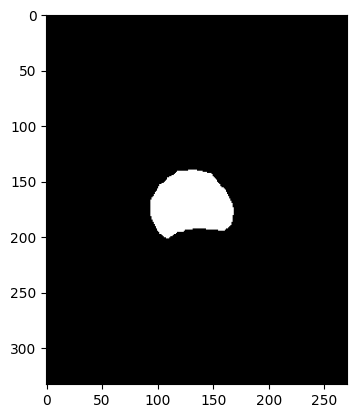

In [43]:
plt.imshow(multi_atlas,cmap='gray')

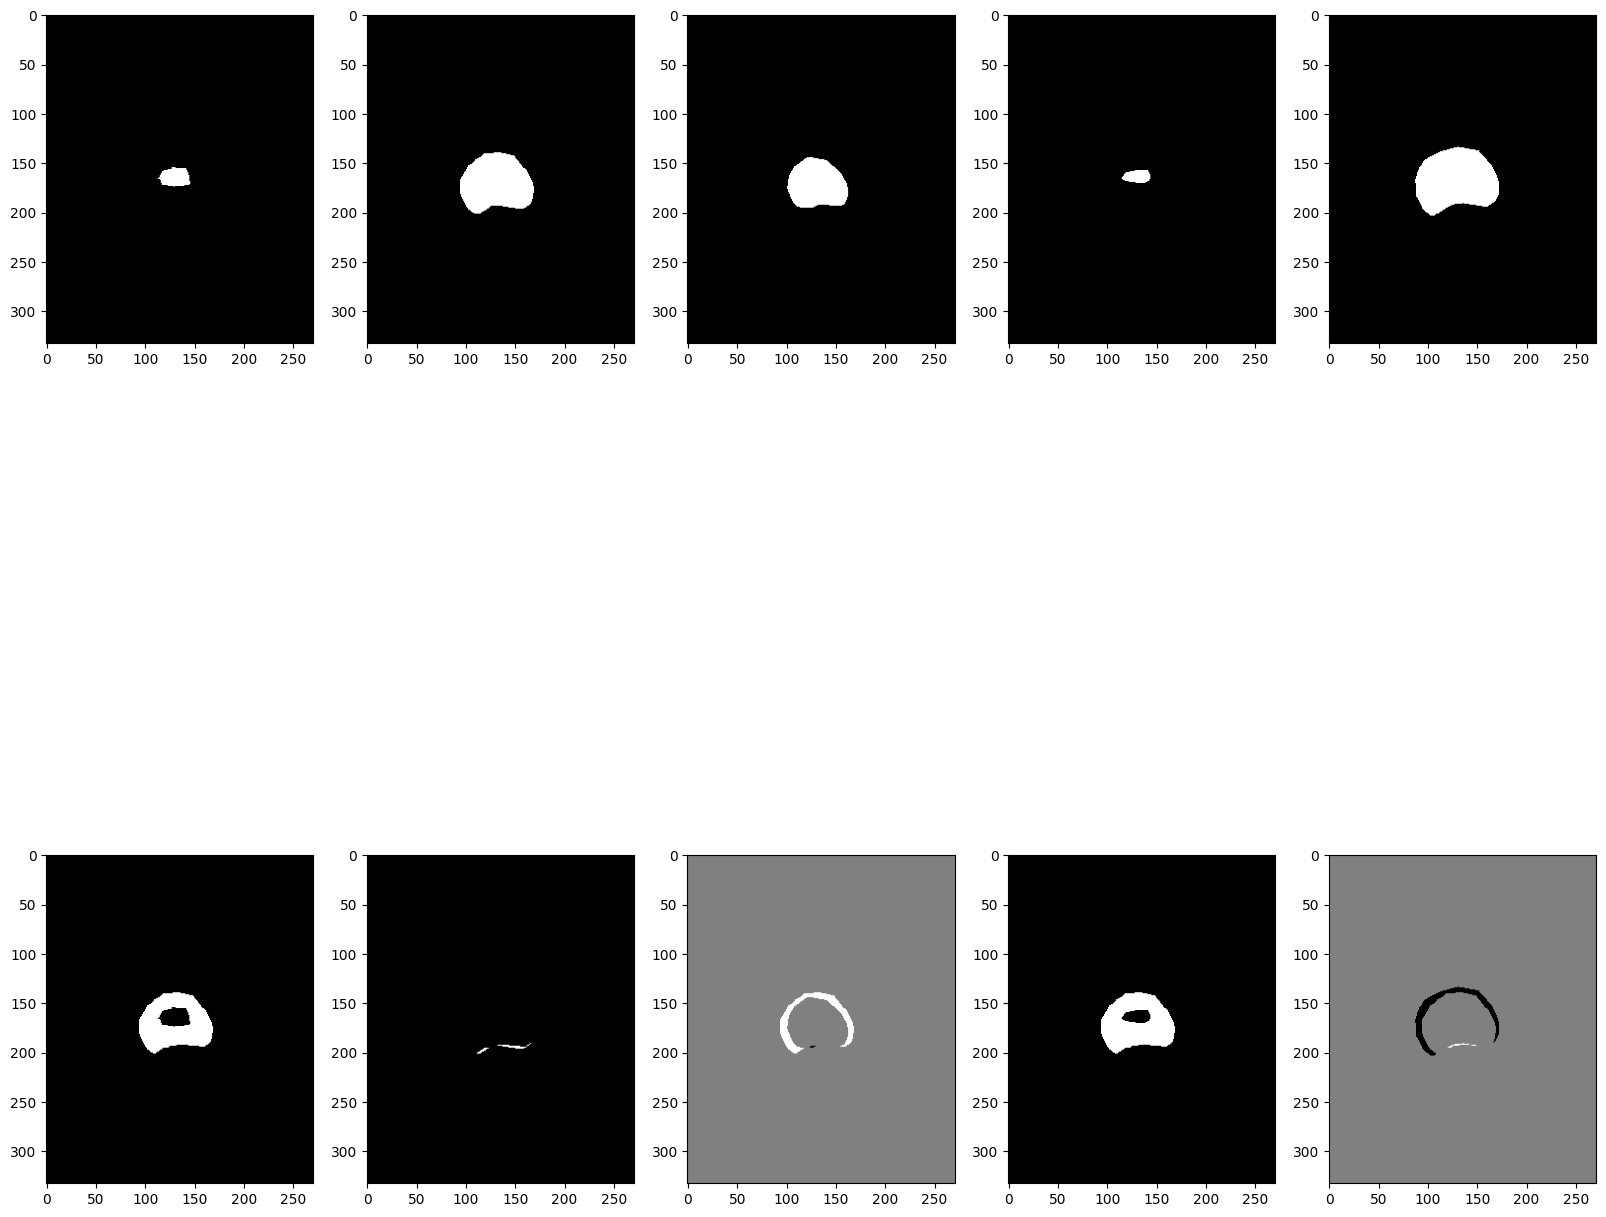

In [52]:
#Even gekeken hoe de masks eruit zien. 

data_path=r'C:\Users\20181758\Documents\master\Q3\capita\TrainingData\TrainingData\p107\prostaat.mhd'
im=imageio.imread(data_path)

fig,ax=plt.subplots(2,5,figsize=(20,20))

dif1=multi_atlas-im[34,:,:]
dif2=im[42,:,:]-multi_atlas
dif3=multi_atlas-im[39,:,:]
dif4=multi_atlas-im[33,:,:]
dif5=multi_atlas-im[45,:,:]

ax[0,0].imshow(im[34,:,:],cmap='gray')
ax[0,1].imshow(im[42,:,:],cmap='gray')
ax[0,2].imshow(im[39,:,:],cmap='gray')
ax[0,3].imshow(im[33,:,:],cmap='gray')
ax[0,4].imshow(im[45,:,:],cmap='gray')
ax[1,0].imshow(dif1,cmap='gray')
ax[1,1].imshow(dif2,cmap='gray')
ax[1,2].imshow(dif3,cmap='gray')
ax[1,3].imshow(dif4,cmap='gray')
ax[1,4].imshow(dif5,cmap='gray')
